### quartiles
- bring in STF field data  
- get quartile values  
- then create equation that applies those values to the 3 0-1 layers

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import geopandas as gpd

In [21]:
# Replace with the path to your GeoJSON file
file_path = "STF-field-sites_RC4_NCNERCRENW.geojson"

# Load the GeoJSON file
gdf = gpd.read_file(file_path)
gdf.columns

Index(['Point', 'Albers_East', 'Albers_North', 'Albers_Obs', 'Date', 'State',
       'Estuary', 'Site', 'Site_Code', 'Plot_ID', 'Structure', 'Ecosystem',
       'Dom_Gen_Tal', 'Dom_Gen_Sta', 'MGA_Zone', 'Datum_Original',
       'East_Original', 'North_Original', 'GPS_Method', 'GPS_Notes', 'Elev',
       'Hprec', 'Vprec', 'Soil_Sample', 'Obs', 'Community', 'Sp_Comp1',
       'Sp_Comp2', 'Connectivity_1', 'Elevation_1', 'Raw_connectivity_1',
       'Raw_Elevation_1', 'Woody_1', 'ALLSTF', 'TRUESTF', 'geometry'],
      dtype='object')

In [57]:
# Export GeoDataFrame to CSV
gdf.to_csv('exported_gdf.csv', index=False)

In [56]:
# pd.set_option('display.max_rows', None)

In [24]:
# model data needed
selected_columns = ['Connectivity_1', 'Elevation_1', 'Woody_1', 'ALLSTF', 'TRUESTF']
selected_gdf = gdf[selected_columns]

In [39]:
# Filter the data where ALLSTF is equal to a value of 1
ALLSTF_0 = selected_gdf[selected_gdf['ALLSTF'] == 0]
ALLSTF_1 = selected_gdf[selected_gdf['ALLSTF'] == 1]

TRUESTF_0 = selected_gdf[selected_gdf['TRUESTF'] == 0]
TRUESTF_1 = selected_gdf[selected_gdf['TRUESTF'] == 1]


In [45]:
# Calculate quartiles
ALLSTF_0_quartiles = ALLSTF_0.quantile([0.25, 0.5, 0.75])
ALLSTF_1_quartiles = ALLSTF_1.quantile([0.25, 0.5, 0.75])
TRUESTF_0_quartiles = TRUESTF_0.quantile([0.25, 0.5, 0.75])
TRUESTF_1_quartiles = TRUESTF_1.quantile([0.25, 0.5, 0.75])



array([[<Axes: title={'center': 'Connectivity_1'}>,
        <Axes: title={'center': 'Elevation_1'}>],
       [<Axes: title={'center': 'Woody_1'}>,
        <Axes: title={'center': 'ALLSTF'}>],
       [<Axes: title={'center': 'TRUESTF'}>, <Axes: >]], dtype=object)

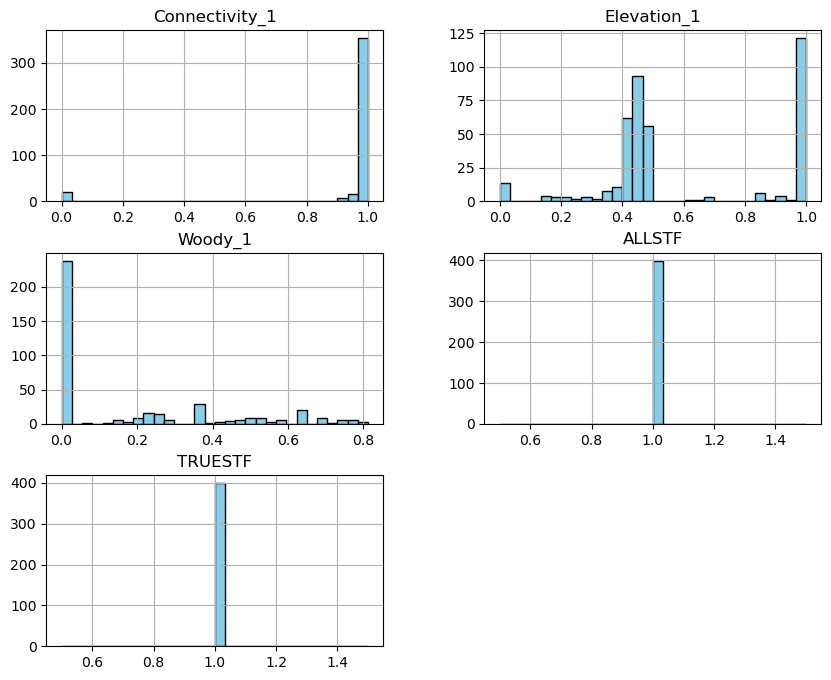

In [58]:
TRUESTF_1.hist(bins=30, figsize=(10, 8), color='skyblue', edgecolor='black')

In [54]:
TRUESTF_1_quartiles#, ALLSTF_1_quartiles#, TRUESTF_0_quartiles, TRUESTF_1_quartiles

,Connectivity_1,Elevation_1,Woody_1,ALLSTF,TRUESTF
0.25,0.989530,0.419036,0.000000,1.0,1.0
0.50,0.997424,0.465650,0.000000,1.0,1.0
0.75,1.000000,1.000000,0.363056,1.0,1.0


array([[<Axes: title={'center': 'Connectivity_1'}>,
        <Axes: title={'center': 'Elevation_1'}>],
       [<Axes: title={'center': 'Woody_1'}>,
        <Axes: title={'center': 'ALLSTF'}>],
       [<Axes: title={'center': 'TRUESTF'}>, <Axes: >]], dtype=object)

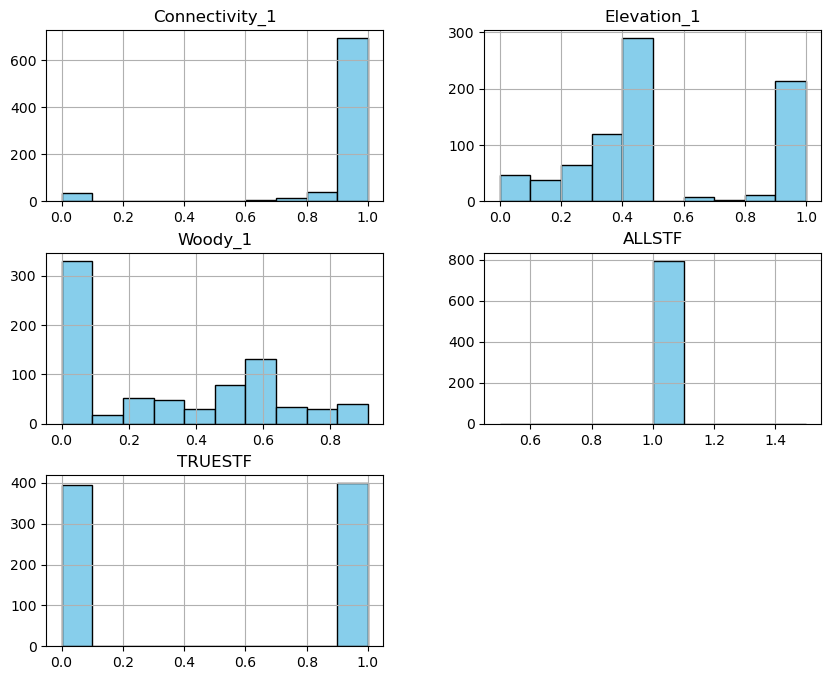

In [31]:
# Filter the data where ALLSTF is equal to a value of 1
filtered_gdf = selected_gdf[selected_gdf['ALLSTF'] == 1]
filtered_gdf.hist(bins=10, figsize=(10, 8), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'Connectivity_1'}>,
        <Axes: title={'center': 'Elevation_1'}>],
       [<Axes: title={'center': 'Woody_1'}>,
        <Axes: title={'center': 'ALLSTF'}>],
       [<Axes: title={'center': 'TRUESTF'}>, <Axes: >]], dtype=object)

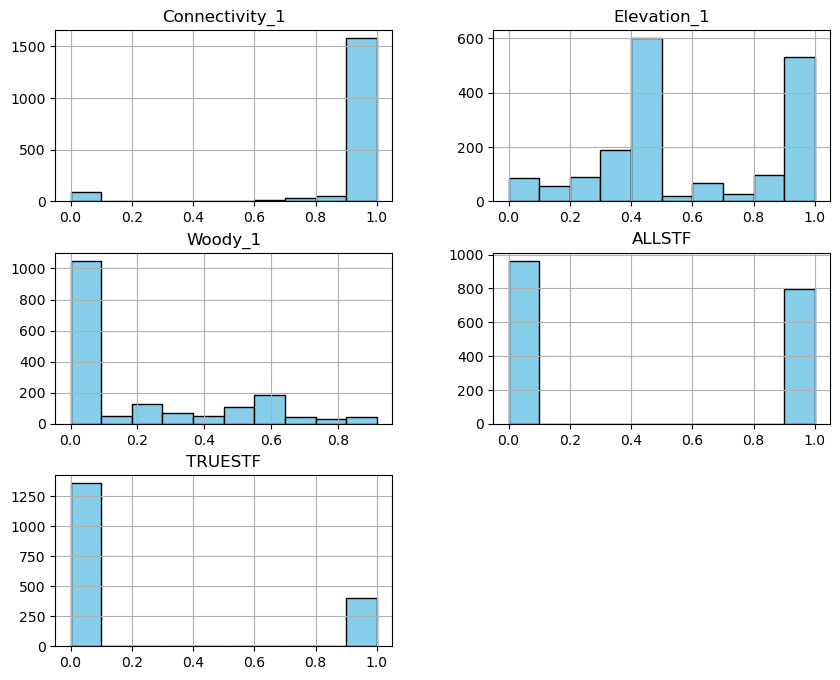

In [26]:
selected_gdf.hist(bins=10, figsize=(10, 8), color='skyblue', edgecolor='black')

array([[<Axes: title={'center': 'Point'}>,
        <Axes: title={'center': 'Albers_East'}>,
        <Axes: title={'center': 'Albers_North'}>,
        <Axes: title={'center': 'East_Original'}>],
       [<Axes: title={'center': 'North_Original'}>,
        <Axes: title={'center': 'Elev'}>,
        <Axes: title={'center': 'Hprec'}>,
        <Axes: title={'center': 'Vprec'}>],
       [<Axes: title={'center': 'Soil_Sample'}>,
        <Axes: title={'center': 'Connectivity_1'}>,
        <Axes: title={'center': 'Elevation_1'}>,
        <Axes: title={'center': 'Raw_connectivity_1'}>],
       [<Axes: title={'center': 'Raw_Elevation_1'}>,
        <Axes: title={'center': 'Woody_1'}>,
        <Axes: title={'center': 'ALLSTF'}>,
        <Axes: title={'center': 'TRUESTF'}>]], dtype=object)

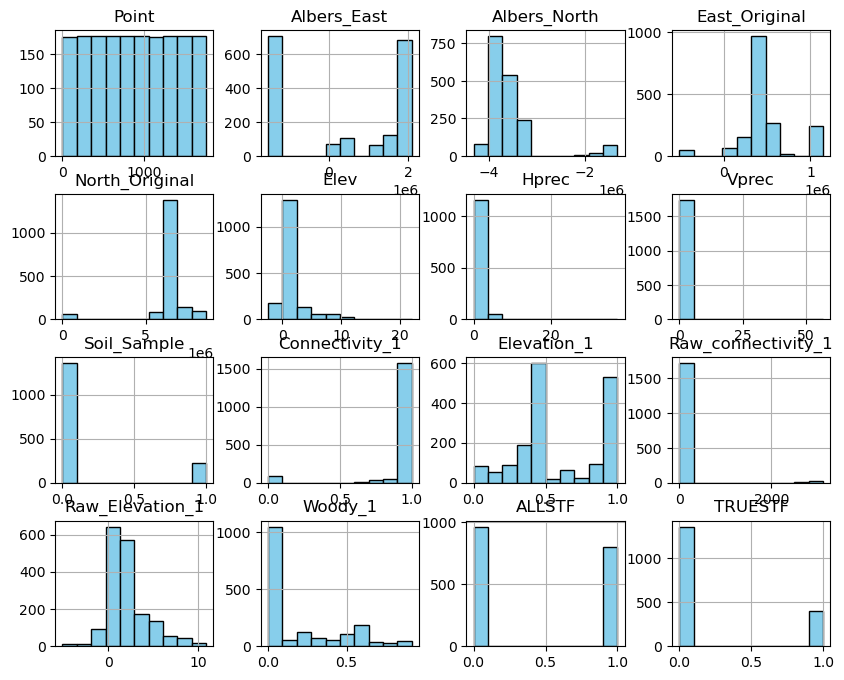

In [22]:
gdf.hist(bins=10, figsize=(10, 8), color='skyblue', edgecolor='black')

In [3]:
# Replace with the path to your Excel file
file_path = "fake_data.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

array([[<Axes: title={'center': 'STF'}>,
        <Axes: title={'center': 'Elevation'}>],
       [<Axes: title={'center': 'Connectivity'}>,
        <Axes: title={'center': 'Woody'}>]], dtype=object)

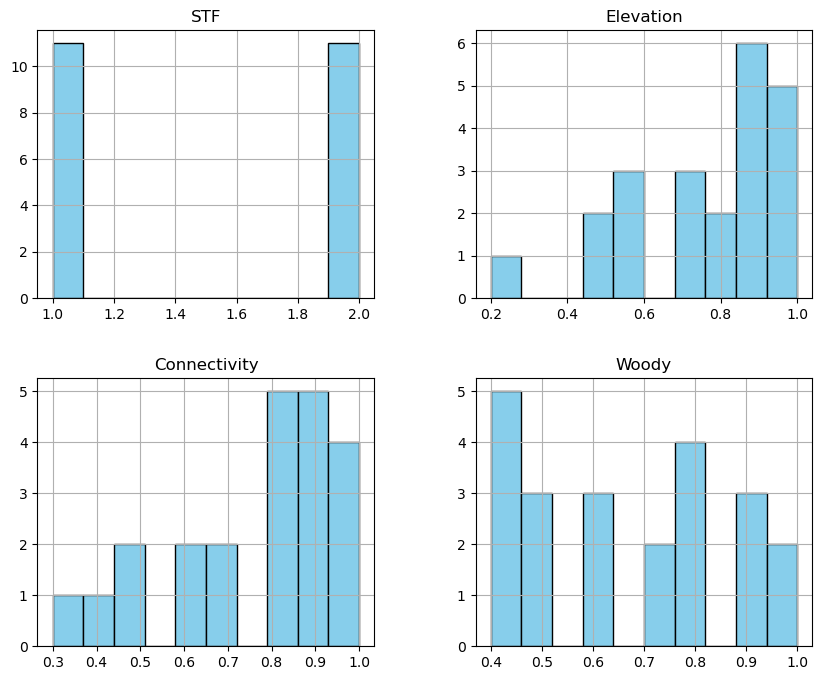

In [17]:
df.hist(bins=10, figsize=(10, 8), color='skyblue', edgecolor='black')

In [5]:
# Calculate quartiles
quartiles = df.quantile([0.25, 0.5, 0.75])

print("Quartiles:")
print(quartiles)

# Summary statistics (includes quartiles)
summary = df.describe()
print("\nSummary Statistics:")
print(summary)

Quartiles:
      STF  Elevation  Connectivity  Woody
0.25  1.0       0.55          0.55   0.45
0.50  1.0       0.60          0.80   0.60
0.75  1.0       0.80          0.90   0.75

Summary Statistics:
        STF  Elevation  Connectivity      Woody
count  11.0  11.000000     11.000000  11.000000
mean    1.0   0.654545      0.718182   0.618182
std     0.0   0.225227      0.240076   0.208893
min     1.0   0.200000      0.300000   0.400000
25%     1.0   0.550000      0.550000   0.450000
50%     1.0   0.600000      0.800000   0.600000
75%     1.0   0.800000      0.900000   0.750000
max     1.0   1.000000      1.000000   1.000000


In [6]:
quartiles

,STF,Elevation,Connectivity,Woody
0.25,1.0,0.55,0.55,0.45
0.50,1.0,0.60,0.80,0.60
0.75,1.0,0.80,0.90,0.75


### logistic regression
- this is a classification ML
- we shouldnt use a linear regression (or other regression) as our dependent data isn't continuous
- do a classification like logistic regression will provide us with a probability of being in a class, which we can then use as the probability of being STF


In [9]:
# Replace with the path to your Excel file
file_path = "fake_data2.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [10]:
df

,STF,Elevation,Connectivity,Woody
0,1,0.7,1.0,0.4
1,1,0.6,0.9,0.5
2,1,0.5,0.9,0.6
3,1,0.6,0.8,0.7
4,1,0.2,0.6,0.6
5,1,0.5,0.7,0.8
6,1,0.7,0.8,0.9
7,1,0.9,1.0,1.0
8,1,0.9,0.5,0.5
9,1,1.0,0.4,0.4


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Define features (X) and target (y)
X = df[["Elevation", "Connectivity", "Woody"]]  # Features
y = df["STF"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Predictions: {y_pred}")

Mean Squared Error: 0.2931776815991979
R-squared: -0.22157367332999134
Predictions: [1.75290194 1.76017681 1.55373909 1.50097039 1.46716456]


In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Predicted probabilities for class 1:
[0.46737102 0.42279965 0.4726309  0.50137046 0.48414617]


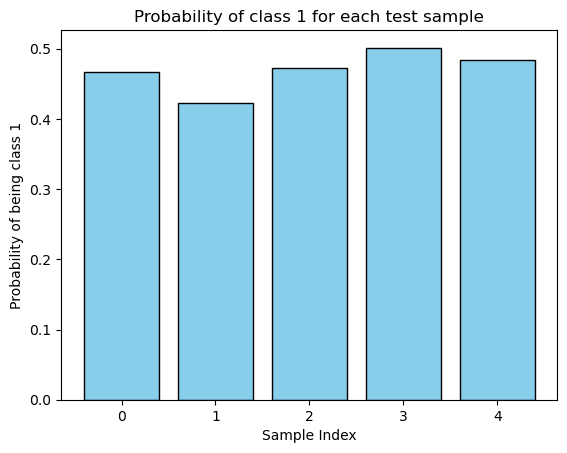

In [14]:
# Define features (X) and target (y)
X = df[["Elevation", "Connectivity", "Woody"]]  # Features
y = df["STF"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if convergence warning occurs
model.fit(X_train, y_train)

# Get predicted probabilities (probabilities for class 1 and class 2)
y_prob = model.predict_proba(X_test)

# y_prob[:, 0] gives the probability of being in class 1
print("Predicted probabilities for class 1:")
print(y_prob[:, 0])

# Plotting the probability of class 1 for each sample
plt.bar(range(len(y_prob)), y_prob[:, 0], color='skyblue', edgecolor='black')
plt.xlabel("Sample Index")
plt.ylabel("Probability of being class 1")
plt.title("Probability of class 1 for each test sample")
plt.show()

In [18]:
y_prob

array([[0.46737102, 0.53262898],
       [0.42279965, 0.57720035],
       [0.4726309 , 0.5273691 ],
       [0.50137046, 0.49862954],
       [0.48414617, 0.51585383]])

In [16]:
r2 = r2_score(y_test, y_pred)  # R-squared
r2

-0.22157367332999134